In [1]:
import flask
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from flask import Flask
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [2]:
!pip list flask

Package                            Version
---------------------------------- ---------------
absl-py                            2.1.0
aiobotocore                        2.5.0
aiofiles                           22.1.0
aiohttp                            3.8.5
aioitertools                       0.7.1
aiosignal                          1.2.0
aiosqlite                          0.18.0
alabaster                          0.7.12
alembic                            1.14.0
altair                             5.3.0
anaconda-anon-usage                0.4.2
anaconda-catalogs                  0.2.0
anaconda-client                    1.12.1
anaconda-cloud-auth                0.1.3
anaconda-navigator                 2.5.3
anaconda-project                   0.11.1
anyio                              3.5.0
appdirs                            1.4.4
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              1.2.3
astroid                            2.

In [3]:
    df_pricing = pd.read_csv("C:/Users/Monaim/projet_bloc_5/data/get_around_pricing_project.csv", index_col=False)

In [4]:
df_analysis = pd.read_excel("C:/Users/Monaim/projet_bloc_5/data/get_around_delay_analysis.xlsx")

In [5]:
df_pricing.drop(['Unnamed: 0'], inplace=True, axis=1)

In [6]:
df_pricing.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [7]:
#df_pricing["car_id"] = select_id_card

In [8]:
df_analysis.dropna(subset=["delay_at_checkout_in_minutes"],inplace=True)

In [9]:
select_id_card = list(set(df_analysis["car_id"]))[0:4843]

In [10]:
df_pricing.insert(0, "car_id", select_id_card)

In [11]:
df_pricing

,car_id,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,262144,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,360459,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,360460,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,393227,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,393239,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,414990,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,414991,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,349458,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,415000,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [12]:
select_id_card

[262144,
 360459,
 360460,
 393227,
 393239,
 360474,
 327708,
 229411,
 262187,
 360493,
 294959,
 327732,
 262199,
 262206,
 393281,
 393286,
 360519,
 360520,
 393298,
 163933,
 229475,
 360548,
 360551,
 163949,
 393328,
 229495,
 327803,
 327806,
 229512,
 393359,
 360597,
 295067,
 393373,
 360606,
 229540,
 360624,
 327865,
 295102,
 327871,
 295105,
 262344,
 262358,
 393442,
 393444,
 393465,
 393471,
 229646,
 393486,
 360727,
 295200,
 196898,
 229668,
 393514,
 196909,
 229678,
 196913,
 393537,
 196929,
 328013,
 393549,
 328016,
 393558,
 328045,
 393584,
 360829,
 393617,
 360854,
 197014,
 393628,
 360861,
 360872,
 360880,
 393651,
 393658,
 295358,
 262591,
 360901,
 393670,
 328135,
 360902,
 328139,
 295376,
 360929,
 360935,
 360943,
 295415,
 393723,
 393729,
 295435,
 360978,
 393746,
 360981,
 393750,
 393749,
 262707,
 393780,
 393781,
 393789,
 328256,
 328263,
 393799,
 197198,
 361040,
 328286,
 361055,
 393824,
 393845,
 393847,
 295580,
 328358,
 393908,
 

In [13]:
df_analysis

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
...,...,...,...,...,...,...,...
21304,573322,376491,connect,ended,-66.0,NaN,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [14]:
stats = pd.DataFrame()
stats["missing_value"] = df_analysis.isnull().sum()
stats["data_type"] = df_analysis.dtypes
stats["valeur_unique"] = df_analysis.nunique()
stats

,missing_value,data_type,valeur_unique
rental_id,0,int64,16346
car_id,0,int64,6689
checkin_type,0,object,2
state,0,object,2
delay_at_checkout_in_minutes,0,float64,1745
previous_ended_rental_id,14831,float64,1515
time_delta_with_previous_rental_in_minutes,14831,float64,25


In [15]:
stats2 = pd.DataFrame()
stats2["missing_value"] = df_pricing.isnull().sum()
stats2["data_type"] = df_pricing.dtypes
stats2["valeur_unique"] = df_pricing.nunique()
stats2

,missing_value,data_type,valeur_unique
car_id,0,int64,4843
model_key,0,object,28
mileage,0,int64,4786
engine_power,0,int64,61
fuel,0,object,4
paint_color,0,object,10
car_type,0,object,8
private_parking_available,0,bool,2
has_gps,0,bool,2
has_air_conditioning,0,bool,2


In [16]:
df_analysis["state"].value_counts()

ended       16345
canceled        1
Name: state, dtype: int64

In [17]:
df_final = pd.merge(df_analysis, df_pricing)

In [18]:
stats_final = pd.DataFrame()
stats_final["missing_value"] = df_final.isnull().sum()
stats_final["data_type"] = df_final.dtypes
stats_final["valeur_unique"] = df_final.nunique()
stats_final

,missing_value,data_type,valeur_unique
rental_id,0,int64,11622
car_id,0,int64,4843
checkin_type,0,object,2
state,0,object,2
delay_at_checkout_in_minutes,0,float64,1476
previous_ended_rental_id,10590,float64,1032
time_delta_with_previous_rental_in_minutes,10590,float64,25
model_key,0,object,28
mileage,0,int64,4786
engine_power,0,int64,61


In [19]:
df_final.drop(["previous_ended_rental_id", "time_delta_with_previous_rental_in_minutes"], axis=1, inplace=True)

In [20]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,estate,False,True,False,False,False,False,True,75
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,hatchback,False,True,False,False,False,False,True,104
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,sedan,True,True,False,False,True,False,True,128
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,suv,False,True,False,True,False,True,True,127


## analyse de donnée

<Axes: >

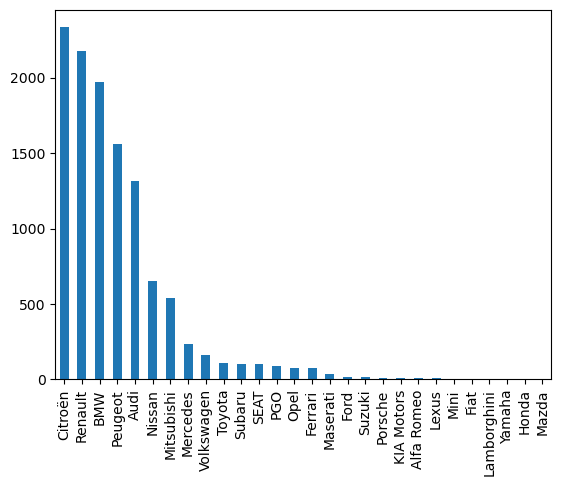

In [21]:
pd.DataFrame(df_final["model_key"].value_counts())["model_key"].plot.bar()

In [22]:
pd.DataFrame(df_final["model_key"].value_counts())

,model_key
Citroën,2334
Renault,2180
BMW,1974
Peugeot,1561
Audi,1316
Nissan,653
Mitsubishi,542
Mercedes,238
Volkswagen,163
Toyota,112


In [23]:
pd.DataFrame(df_final["fuel"].value_counts())

,fuel
diesel,11114
petrol,489
hybrid_petrol,12
electro,7


In [24]:
mileage_class = []
for m in df_final["mileage"]:
    if m <= 100000:
        mileage_class.append("< à 100k")
    elif m > 100000 and m <= 200000:
        mileage_class.append("> 100k < 200k")
    else:
        mileage_class.append("> 200k")
df_final["mileage_class"] = mileage_class

In [25]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122,> 100k < 200k
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122,> 100k < 200k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,estate,False,True,False,False,False,False,True,75,> 100k < 200k
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,hatchback,False,True,False,False,False,False,True,104,> 100k < 200k
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,sedan,True,True,False,False,True,False,True,128,> 100k < 200k
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,suv,False,True,False,True,False,True,True,127,> 100k < 200k


In [26]:
pd.DataFrame(df_final["mileage_class"].value_counts())

,mileage_class
> 100k < 200k,7497
< à 100k,2728
> 200k,1397


In [27]:
pd.DataFrame(df_final["state"].value_counts())

,state
ended,11621
canceled,1


In [28]:
retard = []
for t in df_final["delay_at_checkout_in_minutes"]:
    if t <= 0:
        retard.append(0)
    else:
        retard.append(1)
df_final["delay"] = retard

In [29]:
pd.crosstab(df_final["mileage_class"], df_final["delay"], normalize=True)

delay,0,1
mileage_class,,
< à 100k,0.102306,0.132421
> 100k < 200k,0.264154,0.380916
> 200k,0.050938,0.069265


In [30]:
min(df_final["engine_power"])

0

In [31]:
df_final = df_final[df_final["engine_power"]!=50]

In [32]:
df_final[df_final["engine_power"]==0]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay
2600,526111,377781,mobile,ended,-2.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,0
2601,545504,377781,mobile,ended,38.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1
2602,518059,377781,mobile,ended,161.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1
2603,550195,377781,mobile,ended,0.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,0
2604,544750,377781,mobile,ended,-50.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,0
2605,564190,377781,mobile,ended,218.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1
2606,544138,377781,mobile,ended,6.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1
2607,551420,377781,mobile,ended,-113.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,0
2608,559769,377781,mobile,ended,81.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1
2609,539387,377781,mobile,ended,22.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,False,False,108,< à 100k,1


<Axes: ylabel='delay'>

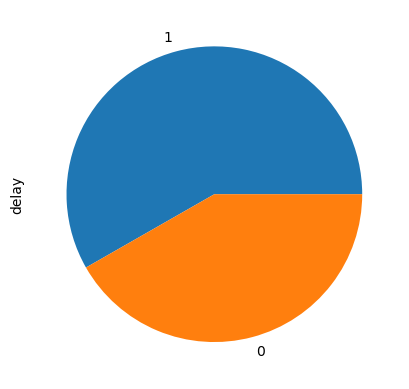

In [33]:
pd.DataFrame(df_final["delay"].value_counts())["delay"].plot.pie()

In [34]:
engine_power_class = []
for e in df_final["engine_power"]:
    if e <= 100:
        engine_power_class.append("< à 100")
    elif e > 100 and e <= 150:
        engine_power_class.append("> 100 < 150")
    else:
        engine_power_class.append("> 150")
df_final["engine_power_class"] = engine_power_class

In [35]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,...,True,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,...,True,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,...,True,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,...,True,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,...,True,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,...,True,False,False,False,False,True,75,> 100k < 200k,0,< à 100
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,...,True,False,False,False,False,True,104,> 100k < 200k,1,> 100 < 150
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,...,True,False,False,True,False,True,128,> 100k < 200k,1,> 150
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,...,True,False,True,False,True,True,127,> 100k < 200k,1,> 100 < 150


In [36]:
pd.crosstab(df_final["engine_power_class"], df_final["delay"])

delay,0,1
engine_power_class,,
< à 100,1281,1849
> 100 < 150,2559,3629
> 150,1011,1293


In [37]:
df_final["engine_power_class"].value_counts()

> 100 < 150    6188
< à 100        3130
> 150          2304
Name: engine_power_class, dtype: int64

In [38]:
df_final["delay"].value_counts()

1    6771
0    4851
Name: delay, dtype: int64

In [39]:
max(df_final["rental_price_per_day"])

422

In [40]:
min(df_final["rental_price_per_day"])

10

In [41]:
rental_price_per_day_class = []
for r in df_final["rental_price_per_day"]:
    if r <= 100:
        rental_price_per_day_class.append("< à 100e")
    elif r > 100 and r <= 200:
        rental_price_per_day_class.append("> 100 < 150e")
    elif r > 200 and r <= 300:
        rental_price_per_day_class.append("> 150 < 300e")
    else:
        rental_price_per_day_class.append("> 300e")
df_final["rental_price_per_day_class"] = rental_price_per_day_class

In [42]:
pd.DataFrame(df_final["rental_price_per_day_class"].value_counts())

,rental_price_per_day_class
> 100 < 150e,8887
< à 100e,2449
> 150 < 300e,279
> 300e,7


In [43]:
pd.crosstab(df_final["rental_price_per_day_class"], df_final["delay"])

delay,0,1
rental_price_per_day_class,,
< à 100e,953,1496
> 100 < 150e,3787,5100
> 150 < 300e,109,170
> 300e,2,5


In [44]:
df_agg = df_final.groupby("car_id").agg("count")

In [45]:
df_agg

,rental_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
car_id,,,,,,,,,,,,,,,,,,,,,
163933,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
163949,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
164713,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
164719,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
164904,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414937,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
414948,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
414990,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
max(df_agg["rental_id"])

25

In [47]:
df_agg[df_agg["rental_id"]==25]

,rental_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
car_id,,,,,,,,,,,,,,,,,,,,,
241021,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [48]:
df_final[df_final["car_id"]== 241021]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
805,554508,241021,connect,ended,-37.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,0,< à 100,< à 100e
806,563552,241021,connect,ended,25.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,1,< à 100,< à 100e
807,567278,241021,connect,ended,-425.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,0,< à 100,< à 100e
808,561487,241021,connect,ended,-209.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,0,< à 100,< à 100e
809,566398,241021,connect,ended,-288.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,0,< à 100,< à 100e
810,540311,241021,connect,ended,48.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,1,< à 100,< à 100e
811,542613,241021,connect,ended,87.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,1,< à 100,< à 100e
812,571991,241021,connect,ended,-14.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,0,< à 100,< à 100e
813,534073,241021,connect,ended,283.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,1,< à 100,< à 100e
814,574151,241021,connect,ended,3.0,BMW,121510,85,diesel,black,...,False,False,False,True,True,96,> 100k < 200k,1,< à 100,< à 100e


In [49]:
df_agg_exemple_complet = df_final.groupby("car_id").agg(
{
    "rental_id" : "count",
    "delay_at_checkout_in_minutes" : ["max","min"],
    "rental_price_per_day" : list
}

)

In [50]:
df_agg_exemple_complet

rental_id delay_at_checkout_in_minutes        rental_price_per_day
           count                          max    min                 list
car_id                                                                   
163933         1                       -226.0 -226.0                 [88]
163949         1                          3.0    3.0                [153]
164713         2                        -27.0 -600.0             [52, 52]
164719         1                        -15.0  -15.0                [154]
164904         1                        296.0  296.0                [110]
...          ...                          ...    ...                  ...
414937         1                       -541.0 -541.0                [133]
414948         1                         -2.0   -2.0                [127]
414990         1                          8.0    8.0                [121]
414991         1                        225.0  225.0                [132]
415000         1                         50.0   50.0                [151]

[4843 rows x 4 columns]

In [51]:
df_agg_exemple_complet[df_agg_exemple_complet["rental_id"]["count"]==25]

rental_id delay_at_checkout_in_minutes         \
           count                          max    min   
car_id                                                 
241021        25                        283.0 -486.0   

                                     rental_price_per_day  
                                                     list  
car_id                                                     
241021  [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 9...

### machine learning 

In [52]:
df_final["checkin_type"].value_counts()

mobile     9419
connect    2203
Name: checkin_type, dtype: int64

In [53]:
pd.crosstab(df_final["checkin_type"], df_final["delay"])

delay,0,1
checkin_type,,
connect,1237,966
mobile,3614,5805


In [54]:
checkin_type_dict = {
    "connect" : 0,
    "mobile" : 1
}


In [55]:
list_checkin_type_num = []
for value in df_final["checkin_type"]:
    list_checkin_type_num.append(checkin_type_dict[value])
    

In [56]:
list_checkin_2 = []
for value in df_final["checkin_type"]:
    if value == "connect":
        list_checkin_2.append(0)
    else:
        list_checkin_2.append(1)
        

In [57]:
len(df_final["checkin_type"])

11622

In [58]:
34866 / 11622

3.0

In [59]:
df_final["checkin_type"] = list_checkin_type_num

In [60]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,507750,269550,1,ended,-81.0,Citroën,184223,120,diesel,white,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,ended,-70.0,Citroën,184223,120,diesel,white,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,ended,-108.0,Citroën,184223,120,diesel,white,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,ended,-203.0,Citroën,135980,120,diesel,grey,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,ended,-988.0,Citroën,135980,120,diesel,grey,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,ended,-3.0,Renault,150204,85,diesel,blue,...,False,False,False,False,True,75,> 100k < 200k,0,< à 100,< à 100e
11618,569830,404261,1,ended,13.0,Citroën,158548,137,petrol,black,...,False,False,False,False,True,104,> 100k < 200k,1,> 100 < 150,> 100 < 150e
11619,574053,409672,1,ended,169.0,Audi,187367,180,diesel,black,...,False,False,True,False,True,128,> 100k < 200k,1,> 150,> 100 < 150e
11620,568957,346718,1,ended,15.0,Nissan,100488,105,diesel,white,...,False,True,False,True,True,127,> 100k < 200k,1,> 100 < 150,> 100 < 150e


In [61]:
list_checkin_2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [62]:
checkin_type_dict["connect"]

0

In [63]:
pd.DataFrame(df_final["state"].value_counts())

,state
ended,11621
canceled,1


In [64]:
df_final.drop('state', axis=1, inplace=True)

In [65]:
df_final

,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,507750,269550,1,-81.0,Citroën,184223,120,diesel,white,estate,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,-70.0,Citroën,184223,120,diesel,white,estate,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,-108.0,Citroën,184223,120,diesel,white,estate,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,-203.0,Citroën,135980,120,diesel,grey,estate,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,-988.0,Citroën,135980,120,diesel,grey,estate,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,-3.0,Renault,150204,85,diesel,blue,estate,...,False,False,False,False,True,75,> 100k < 200k,0,< à 100,< à 100e
11618,569830,404261,1,13.0,Citroën,158548,137,petrol,black,hatchback,...,False,False,False,False,True,104,> 100k < 200k,1,> 100 < 150,> 100 < 150e
11619,574053,409672,1,169.0,Audi,187367,180,diesel,black,sedan,...,False,False,True,False,True,128,> 100k < 200k,1,> 150,> 100 < 150e
11620,568957,346718,1,15.0,Nissan,100488,105,diesel,white,suv,...,False,True,False,True,True,127,> 100k < 200k,1,> 100 < 150,> 100 < 150e


In [66]:
df_final.drop('delay_at_checkout_in_minutes', axis=1, inplace=True)

In [67]:
df_final["model_key"].value_counts()

Citroën        2334
Renault        2180
BMW            1974
Peugeot        1561
Audi           1316
Nissan          653
Mitsubishi      542
Mercedes        238
Volkswagen      163
Toyota          112
Subaru          104
SEAT            100
PGO              88
Opel             76
Ferrari          74
Maserati         35
Ford             15
Suzuki           15
Porsche          10
KIA Motors        8
Alfa Romeo        8
Lexus             6
Mini              3
Fiat              2
Lamborghini       2
Yamaha            1
Honda             1
Mazda             1
Name: model_key, dtype: int64

In [68]:
pd.crosstab(df_final["model_key"], df_final["delay"])

delay,0,1
model_key,,
Alfa Romeo,3,5
Audi,587,729
BMW,839,1135
Citroën,958,1376
Ferrari,35,39
Fiat,1,1
Ford,5,10
Honda,0,1
KIA Motors,5,3


In [69]:
le = LabelEncoder()
df_final["model_key"] = le.fit_transform(df_final["model_key"])

In [70]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,diesel,white,estate,False,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,3,184223,120,diesel,white,estate,False,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,3,184223,120,diesel,white,estate,False,...,False,False,False,True,True,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,3,135980,120,diesel,grey,estate,True,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,3,135980,120,diesel,grey,estate,True,...,False,False,True,True,True,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,diesel,blue,estate,False,...,False,False,False,False,True,75,> 100k < 200k,0,< à 100,< à 100e
11618,569830,404261,1,3,158548,137,petrol,black,hatchback,False,...,False,False,False,False,True,104,> 100k < 200k,1,> 100 < 150,> 100 < 150e
11619,574053,409672,1,1,187367,180,diesel,black,sedan,True,...,False,False,True,False,True,128,> 100k < 200k,1,> 150,> 100 < 150e
11620,568957,346718,1,16,100488,105,diesel,white,suv,False,...,False,True,False,True,True,127,> 100k < 200k,1,> 100 < 150,> 100 < 150e


In [71]:
df_final["fuel"].value_counts()

diesel           11114
petrol             489
hybrid_petrol       12
electro              7
Name: fuel, dtype: int64

In [72]:
pd.crosstab(df_final["fuel"], df_final["delay"])

delay,0,1
fuel,,
diesel,4640,6474
electro,1,6
hybrid_petrol,5,7
petrol,205,284


In [73]:
df_final["fuel"] = le.fit_transform(df_final["fuel"])

In [74]:
df_final["paint_color"].value_counts()

black     3938
grey      2687
blue      1718
white     1317
brown      865
silver     821
red        128
beige       98
green       38
orange      12
Name: paint_color, dtype: int64

In [75]:
pd.crosstab(df_final["paint_color"], df_final["delay"])

delay,0,1
paint_color,,
beige,38,60
black,1693,2245
blue,748,970
brown,370,495
green,17,21
grey,1047,1640
orange,5,7
red,40,88
silver,328,493


In [76]:
df_final["paint_color"] = le.fit_transform(df_final["paint_color"])

In [77]:
df_final["car_type"].value_counts()

estate         3828
sedan          2910
suv            2457
hatchback      1718
subcompact      277
coupe           248
convertible     107
van              77
Name: car_type, dtype: int64

In [78]:
pd.crosstab(df_final["car_type"], df_final["delay"])

delay,0,1
car_type,,
convertible,37,70
coupe,100,148
estate,1582,2246
hatchback,714,1004
sedan,1252,1658
subcompact,112,165
suv,1019,1438
van,35,42


In [79]:
df_final["car_type"] = le.fit_transform(df_final["car_type"])

In [80]:
df_final["private_parking_available"].value_counts()

True     6390
False    5232
Name: private_parking_available, dtype: int64

In [81]:
pd.crosstab(df_final["private_parking_available"], df_final["delay"])

delay,0,1
private_parking_available,,
False,2158,3074
True,2693,3697


In [82]:
df_final["private_parking_available"] = le.fit_transform(df_final["private_parking_available"])

In [83]:
df_final.columns

Index(['rental_id', 'car_id', 'checkin_type', 'model_key', 'mileage',
       'engine_power', 'fuel', 'paint_color', 'car_type',
       'private_parking_available', 'has_gps', 'has_air_conditioning',
       'automatic_car', 'has_getaround_connect', 'has_speed_regulator',
       'winter_tires', 'rental_price_per_day', 'mileage_class', 'delay',
       'engine_power_class', 'rental_price_per_day_class'],
      dtype='object')

In [84]:
df_final["has_gps"].value_counts()

True     9301
False    2321
Name: has_gps, dtype: int64

In [85]:
pd.crosstab(df_final["has_gps"], df_final["delay"])

delay,0,1
has_gps,,
False,920,1401
True,3931,5370


In [86]:
df_final["has_gps"] = le.fit_transform(df_final["has_gps"])

In [87]:
df_final["has_air_conditioning"].value_counts()

False    9345
True     2277
Name: has_air_conditioning, dtype: int64

In [88]:
pd.crosstab(df_final["has_air_conditioning"], df_final["delay"])

delay,0,1
has_air_conditioning,,
False,3902,5443
True,949,1328


In [89]:
df_final["has_air_conditioning"] = le.fit_transform(df_final["has_air_conditioning"])

In [90]:
df_final["automatic_car"].value_counts()

False    9383
True     2239
Name: automatic_car, dtype: int64

In [91]:
pd.crosstab(df_final["automatic_car"], df_final["delay"])

delay,0,1
automatic_car,,
False,3884,5499
True,967,1272


In [92]:
df_final["automatic_car"] = le.fit_transform(df_final["automatic_car"])

In [93]:
df_final["has_getaround_connect"].value_counts()

False    6353
True     5269
Name: has_getaround_connect, dtype: int64

In [94]:
pd.crosstab(df_final["has_getaround_connect"], df_final["delay"])

delay,0,1
has_getaround_connect,,
False,2635,3718
True,2216,3053


In [95]:
df_final["has_getaround_connect"] = le.fit_transform(df_final["has_getaround_connect"])

In [96]:
df_final["has_speed_regulator"].value_counts()

False    8806
True     2816
Name: has_speed_regulator, dtype: int64

In [97]:
pd.crosstab(df_final["has_speed_regulator"], df_final["delay"])

delay,0,1
has_speed_regulator,,
False,3649,5157
True,1202,1614


In [98]:
df_final["has_speed_regulator"] = le.fit_transform(df_final["has_speed_regulator"])

In [99]:
df_final["winter_tires"].value_counts()

True     10890
False      732
Name: winter_tires, dtype: int64

In [100]:
pd.crosstab(df_final["winter_tires"], df_final["delay"])

delay,0,1
winter_tires,,
False,292,440
True,4559,6331


In [101]:
df_final["winter_tires"] = le.fit_transform(df_final["winter_tires"])

In [102]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,> 100k < 200k,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,3,135980,120,0,5,2,1,...,0,0,1,1,1,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,3,135980,120,0,5,2,1,...,0,0,1,1,1,122,> 100k < 200k,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,0,2,2,0,...,0,0,0,0,1,75,> 100k < 200k,0,< à 100,< à 100e
11618,569830,404261,1,3,158548,137,3,1,3,0,...,0,0,0,0,1,104,> 100k < 200k,1,> 100 < 150,> 100 < 150e
11619,574053,409672,1,1,187367,180,0,1,4,1,...,0,0,1,0,1,128,> 100k < 200k,1,> 150,> 100 < 150e
11620,568957,346718,1,16,100488,105,0,9,6,0,...,0,1,0,1,1,127,> 100k < 200k,1,> 100 < 150,> 100 < 150e


In [103]:
pd.crosstab(df_final["mileage_class"], df_final["delay"])

delay,0,1
mileage_class,,
< à 100k,1189,1539
> 100k < 200k,3070,4427
> 200k,592,805


In [104]:
df_final["mileage_class"] = le.fit_transform(df_final["mileage_class"])

In [105]:
pd.crosstab(df_final["engine_power_class"], df_final["delay"])

delay,0,1
engine_power_class,,
< à 100,1281,1849
> 100 < 150,2559,3629
> 150,1011,1293


In [106]:
df_final["engine_power_class"] = le.fit_transform(df_final["engine_power_class"])

In [107]:
pd.crosstab(df_final["rental_price_per_day_class"], df_final["delay"])

delay,0,1
rental_price_per_day_class,,
< à 100e,953,1496
> 100 < 150e,3787,5100
> 150 < 300e,109,170
> 300e,2,5


In [108]:
df_final["rental_price_per_day_class"] = le.fit_transform(df_final["rental_price_per_day_class"])

In [109]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,1,0,1,1
1,543406,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,1,0,1,1
2,552714,269550,1,3,184223,120,0,9,2,0,...,0,0,0,1,1,111,1,0,1,1
3,511626,398802,1,3,135980,120,0,5,2,1,...,0,0,1,1,1,122,1,0,1,1
4,540217,398802,1,3,135980,120,0,5,2,1,...,0,0,1,1,1,122,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,0,2,2,0,...,0,0,0,0,1,75,1,0,0,0
11618,569830,404261,1,3,158548,137,3,1,3,0,...,0,0,0,0,1,104,1,1,1,1
11619,574053,409672,1,1,187367,180,0,1,4,1,...,0,0,1,0,1,128,1,1,2,1
11620,568957,346718,1,16,100488,105,0,9,6,0,...,0,1,0,1,1,127,1,1,1,1


In [110]:
df_final.drop(["rental_id", "car_id"], axis=1, inplace=True)

In [111]:
df_final

,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay,engine_power_class,rental_price_per_day_class
0,1,3,184223,120,0,9,2,0,1,0,0,0,1,1,111,1,0,1,1
1,1,3,184223,120,0,9,2,0,1,0,0,0,1,1,111,1,0,1,1
2,1,3,184223,120,0,9,2,0,1,0,0,0,1,1,111,1,0,1,1
3,1,3,135980,120,0,5,2,1,1,0,0,1,1,1,122,1,0,1,1
4,1,3,135980,120,0,5,2,1,1,0,0,1,1,1,122,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,1,21,150204,85,0,2,2,0,1,0,0,0,0,1,75,1,0,0,0
11618,1,3,158548,137,3,1,3,0,1,0,0,0,0,1,104,1,1,1,1
11619,1,1,187367,180,0,1,4,1,1,0,0,1,0,1,128,1,1,2,1
11620,1,16,100488,105,0,9,6,0,1,0,1,0,1,1,127,1,1,1,1


### MATRICE DE CORRELATION

<Axes: >

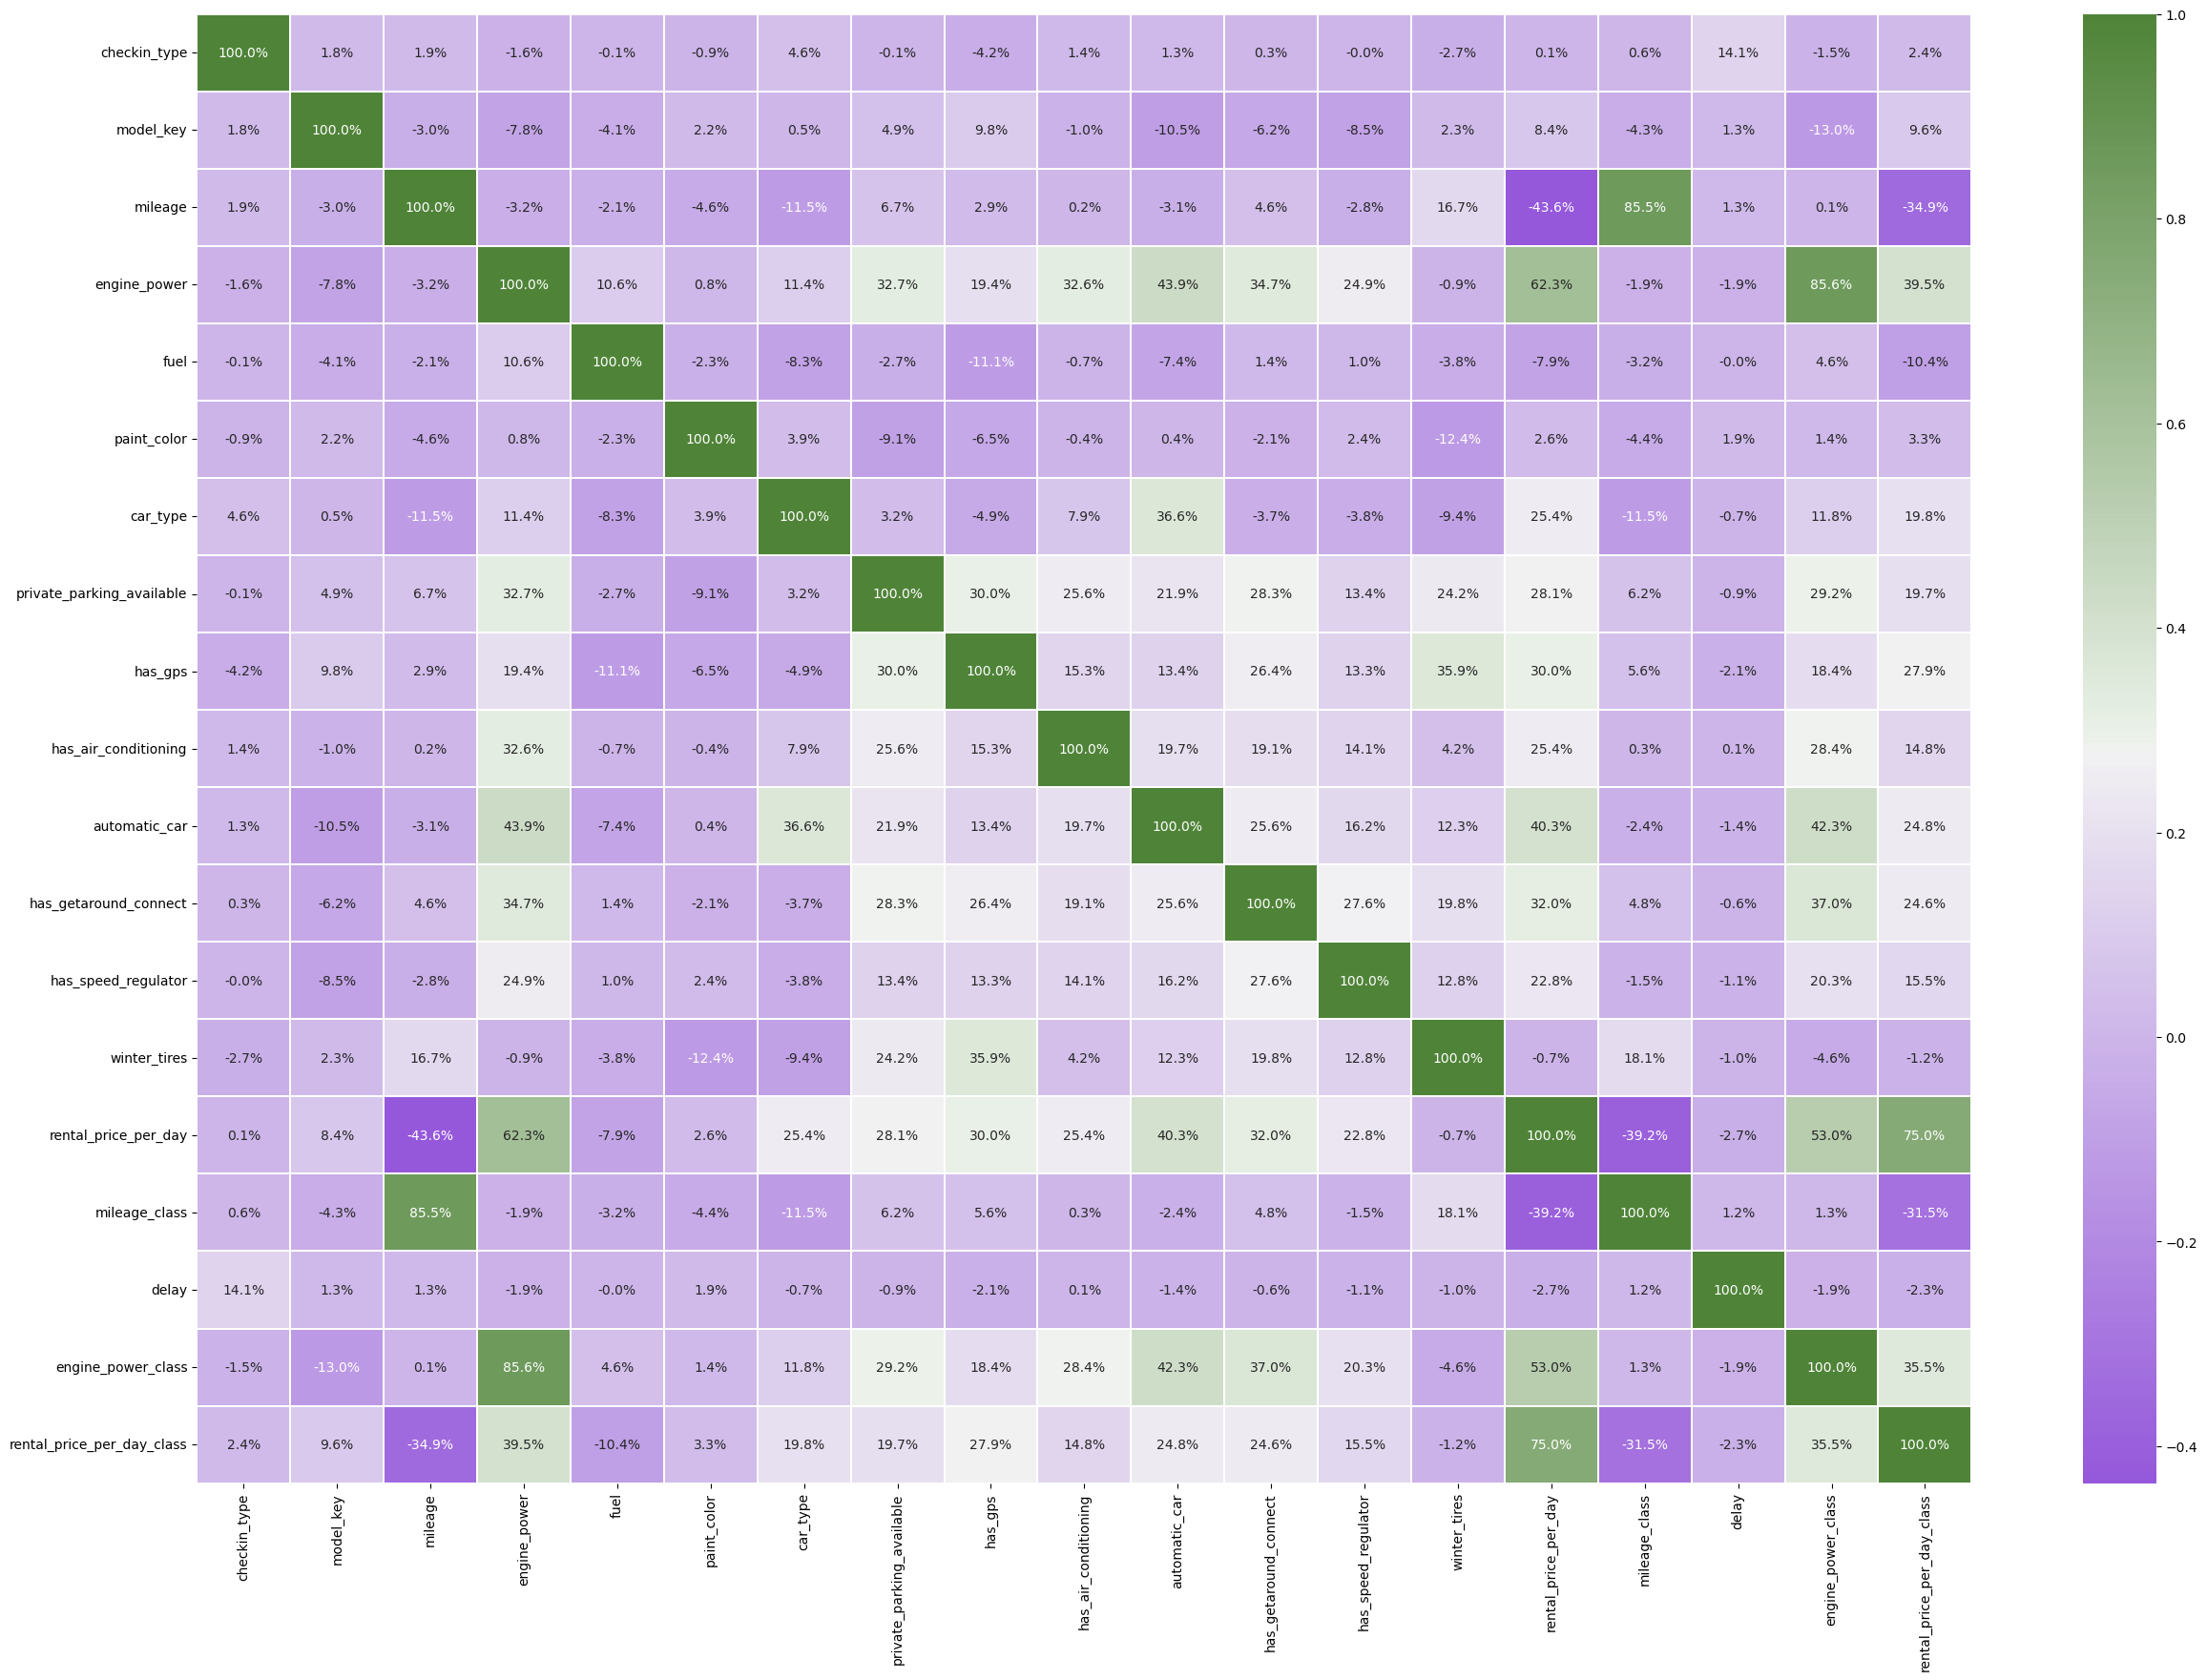

In [112]:
plt.figure(figsize=(30, 20))
cmap_ = sns.diverging_palette(1000, 120, as_cmap=True)
sns.heatmap(df_final.corr(), annot=True, fmt=".1%",linewidths=.06, cmap=cmap_) 

In [113]:
df_ml = df_final[["checkin_type", "engine_power_class", "paint_color", "has_gps", "rental_price_per_day", "delay"]]

In [114]:
df_ml

,checkin_type,engine_power_class,paint_color,has_gps,rental_price_per_day,delay
0,1,1,9,1,111,0
1,1,1,9,1,111,0
2,1,1,9,1,111,0
3,1,1,5,1,122,0
4,1,1,5,1,122,0
...,...,...,...,...,...,...
11617,1,0,2,1,75,0
11618,1,1,1,1,104,1
11619,1,2,1,1,128,1
11620,1,1,9,1,127,1


In [115]:
y = df_ml["delay"].values

In [116]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [117]:
x = df_ml.drop("delay", axis=1)

In [118]:
df_ml

,checkin_type,engine_power_class,paint_color,has_gps,rental_price_per_day,delay
0,1,1,9,1,111,0
1,1,1,9,1,111,0
2,1,1,9,1,111,0
3,1,1,5,1,122,0
4,1,1,5,1,122,0
...,...,...,...,...,...,...
11617,1,0,2,1,75,0
11618,1,1,1,1,104,1
11619,1,2,1,1,128,1
11620,1,1,9,1,127,1


In [119]:
x

,checkin_type,engine_power_class,paint_color,has_gps,rental_price_per_day
0,1,1,9,1,111
1,1,1,9,1,111
2,1,1,9,1,111
3,1,1,5,1,122
4,1,1,5,1,122
...,...,...,...,...,...
11617,1,0,2,1,75
11618,1,1,1,1,104
11619,1,2,1,1,128
11620,1,1,9,1,127


In [120]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Regression lineaire

In [121]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [122]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1 0 0 ... 1 1 1]



In [123]:
accuracy_score_ = accuracy_score(Y_train, Y_train_pred)

In [124]:
accuracy_score_

0.6056792513714101

In [125]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1 1 1 ... 1 1 1]



In [126]:
accuracy_score_test = accuracy_score(Y_test, Y_test_pred)

In [127]:
accuracy_score_test

0.6068817204301076

In [128]:
Y_test

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [129]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_dic = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
}

In [130]:
f1_scores = {}
for model_name, model in classifier_dic.items():
    # entrainement du model sur l'ensemble d'entrainement 
    print(model_name)
    model.fit(X_train,Y_train)
    # la prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    #calcule de f1
    
    f1 = f1_score(Y_test, y_pred)
    # stockage F1 dans le dictionnaire 
    f1_scores[model_name] = f1 

SVC
KNN
RF


In [131]:
f1_scores

{'SVC': 0.7503359312012899,
 'KNN': 0.6196686640817765,
 'RF': 0.6239168110918545}

In [132]:
X_train

,checkin_type,engine_power_class,paint_color,has_gps,rental_price_per_day
9493,1,2,5,1,250
5970,0,0,9,1,99
8709,0,0,3,1,137
10658,1,0,3,1,119
593,1,2,3,1,133
...,...,...,...,...,...
4859,1,1,1,1,86
3264,1,1,1,0,112
9845,1,1,2,1,112
10799,1,1,1,1,124


In [133]:
import pickle
golden_model = SVC()
golden_model.fit(X_train, Y_train)



SVC()

In [134]:
y_pred_test = model.predict(X_test)

In [135]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
f1_score_y_test = f1_score(Y_test, y_pred_test)


In [137]:
f1_score_y_test

0.6239168110918545

In [138]:
with open("golden svc for car_location", "wb") as f:
    pickle.dump(golden_model, f)

In [139]:
with open("golden svc for car_location", "rb") as fr:
    model_charge = pickle.load(fr)
    

In [140]:
model_charge

SVC()

In [141]:
import numpy as np
model_charge.predict([[1, 0 , 2 , 3, 124]])

C:\Users\Monaim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [142]:
X_test

,checkin_type,engine_power_class,paint_color,has_gps,rental_price_per_day
3125,1,1,5,1,114
10928,1,1,2,1,102
10695,1,0,2,0,44
6408,0,0,8,1,105
7261,1,0,5,0,102
...,...,...,...,...,...
1580,1,0,2,1,123
4219,1,1,1,1,66
11263,1,1,0,1,113
410,1,0,9,1,107


In [147]:
X_test["has_gps"].unique()

array([1, 0], dtype=int64)